# Lanjutan nomor 10

In [1]:
import pandas as pd

data_clean = pd.read_csv('Dataset/ulasanapp_3000_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

data_real = pd.read_csv('Dataset/ulasanapp_all_hasiltextpreprocessing.csv')
data_real = pd.DataFrame(data_real)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']
C = data_real['text_tokens_stemmed']

In [2]:
len(data_real)

113442

In [3]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])
# data_clean.drop(columns='content')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')
C = C.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)
C_tfid = tfid_vectorizer.transform(C)

In [5]:
print(A.shape)
print(A_tfid.shape)
print(C.shape)
print(C_tfid.shape)

(2918,)
(2918, 3524)
(113442,)
(113442, 3524)


In [6]:
A_tfid.toarray()
C_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [8]:
C_pred = nb.predict(C_tfid)
data_real['Label NB'] = C_pred
data_real = pd.DataFrame(data_real)
data_real.to_csv('Dataset/ulasanapp_all_hasil_sentimen_NB.csv', index=False)

data_real.head()

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Pengguna Google,1,2024-12-31 12:40:46,"potongan nya skr sangat tidak masuk akal,sudh ...",potongan nya skr sangat tidak masuk akalsudh h...,potongan nya skr masuk akalsudh 10,"['potongan', 'nya', 'skr', 'masuk', 'akalsudh'...",potong nya skr masuk akalsudh 10,negatif
1,Pengguna Google,1,2024-12-31 12:36:03,Mending shopee daripada ini Ribet udah gitu ad...,mending shopee daripada ini ribet udah gitu ad...,mending shopee ribet udah gitu adminnya mahal ...,"['mending', 'shopee', 'ribet', 'udah', 'gitu',...",mending shopee ribet udah gitu adminnya mahal ...,negatif
2,Pengguna Google,1,2024-12-31 12:29:26,Jualan makin susah hanya ada di Tokopedia Apli...,jualan makin susah hanya ada di tokopedia apli...,jualan susah tokopedia aplikasi bug lemod siny...,"['jualan', 'susah', 'tokopedia', 'aplikasi', '...",jual susah tokopedia aplikasi bug lemod sinyal...,positif
3,Pengguna Google,1,2024-12-31 11:12:47,Fitur chat antara pembeli dan penjual sekarang...,fitur chat antara pembeli dan penjual sekarang...,fitur chat pembeli penjual filter filter memba...,"['fitur', 'chat', 'pembeli', 'penjual', 'filte...",fitur chat beli jual filter filter bantu pesan...,negatif
4,Pengguna Google,5,2024-12-31 11:04:58,Bagus.,bagus,bagus,['bagus'],bagus,positif


In [9]:
dr = pd.read_csv('Dataset/ulasanapp_all_hasil_sentimen_NB.csv')
dr = pd.DataFrame(dr)

In [10]:
dr

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Pengguna Google,1,2024-12-31 12:40:46,"potongan nya skr sangat tidak masuk akal,sudh ...",potongan nya skr sangat tidak masuk akalsudh h...,potongan nya skr masuk akalsudh 10,"['potongan', 'nya', 'skr', 'masuk', 'akalsudh'...",potong nya skr masuk akalsudh 10,negatif
1,Pengguna Google,1,2024-12-31 12:36:03,Mending shopee daripada ini Ribet udah gitu ad...,mending shopee daripada ini ribet udah gitu ad...,mending shopee ribet udah gitu adminnya mahal ...,"['mending', 'shopee', 'ribet', 'udah', 'gitu',...",mending shopee ribet udah gitu adminnya mahal ...,negatif
2,Pengguna Google,1,2024-12-31 12:29:26,Jualan makin susah hanya ada di Tokopedia Apli...,jualan makin susah hanya ada di tokopedia apli...,jualan susah tokopedia aplikasi bug lemod siny...,"['jualan', 'susah', 'tokopedia', 'aplikasi', '...",jual susah tokopedia aplikasi bug lemod sinyal...,positif
3,Pengguna Google,1,2024-12-31 11:12:47,Fitur chat antara pembeli dan penjual sekarang...,fitur chat antara pembeli dan penjual sekarang...,fitur chat pembeli penjual filter filter memba...,"['fitur', 'chat', 'pembeli', 'penjual', 'filte...",fitur chat beli jual filter filter bantu pesan...,negatif
4,Pengguna Google,5,2024-12-31 11:04:58,Bagus.,bagus,bagus,['bagus'],bagus,positif
...,...,...,...,...,...,...,...,...,...
113437,Pengguna Google,5,2016-10-13 11:39:48,Kalau bisa di app baru ini udah bisa lihat kod...,kalau bisa di app baru ini udah bisa lihat kod...,app udah lihat kode jne job,"['app', 'udah', 'lihat', 'kode', 'jne', 'job']",app udah lihat kode jne job,positif
113438,Pengguna Google,5,2016-10-12 23:18:35,Mantappp,mantappp,mantappp,['mantappp'],mantappp,positif
113439,Pengguna Google,4,2016-10-12 17:22:42,Test dulu nnt klo ud k instal gua tambah lg,test dulu nnt klo ud k instal gua tambah lg,test nnt klo ud k instal gua lg,"['test', 'nnt', 'klo', 'ud', 'k', 'instal', 'g...",test nnt klo ud k instal gua lg,positif
113440,Pengguna Google,5,2016-10-12 10:55:04,Mantap,mantap,mantap,['mantap'],mantap,positif


In [11]:
# hitung label positif
positif = dr[dr['Label NB'] == "positif"]
print('Label Positif :', len(positif))

# hitung label negatif
negatif = dr[dr['Label NB'] == "negatif"]
print('Label Negatif :', len(negatif))

# totalkan
total = len(dr)
print('Total :', total)

Label Positif : 107369
Label Negatif : 6073
Total : 113442


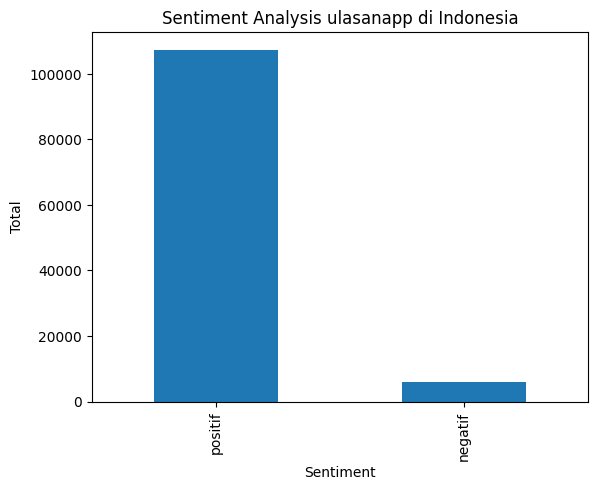

In [12]:
# buatlah line chart berdasarkan tanggal yang paling awal ke paling akhir
import matplotlib.pyplot as plt

dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

dr['date'] = dr['date'].dt.strftime('%Y-%m-%d')
dr['date'] = pd.to_datetime(dr['date'])

dr['Label NB'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis ulasanapp di Indonesia')
plt.xlabel('Sentiment')
plt.ylabel('Total')
plt.show()


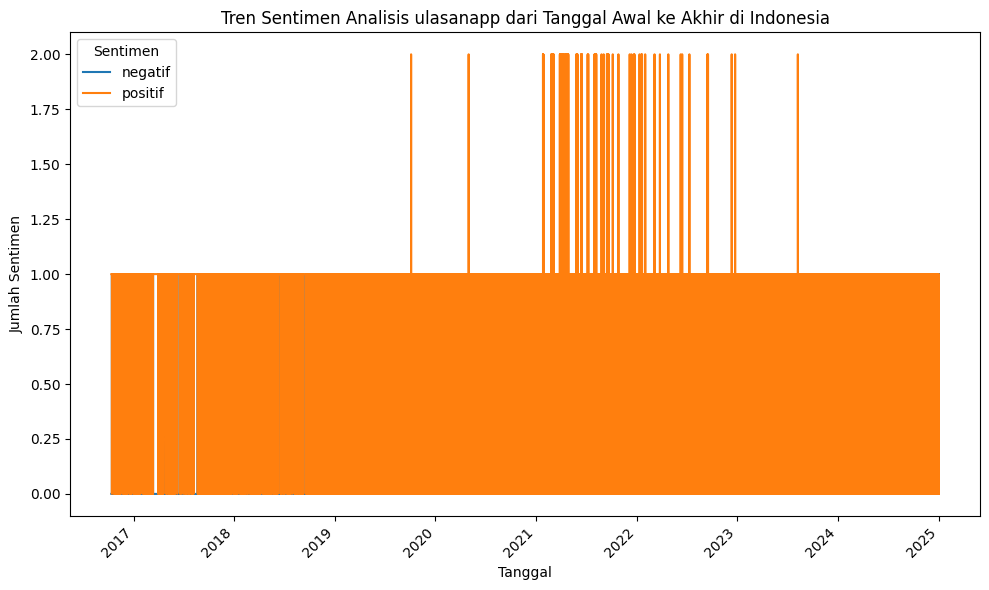

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'at' ke datetime dan sort berdasarkan tanggal
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Agregasi jumlah sentimen per tanggal
sentiment_per_day = dr.groupby(['date', 'Label NB']).size().unstack(fill_value=0)

# Plot Line Chart
sentiment_per_day.plot(kind='line', figsize=(10, 6))

# Tambahkan judul dan label sumbu
plt.title('Tren Sentimen Analisis ulasanapp dari Tanggal Awal ke Akhir di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen', loc='upper left')
plt.tight_layout()

# Tampilkan plot
plt.show()


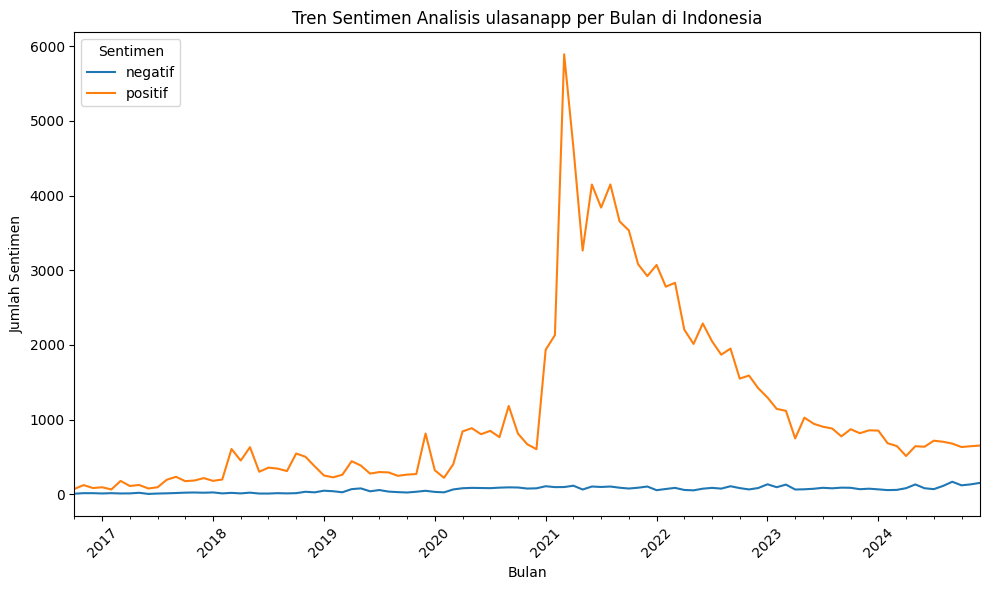

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'at' ke datetime dan sort berdasarkan tanggal
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Tambahkan kolom bulan (format YYYY-MM)
dr['month'] = dr['date'].dt.to_period('M')

# Agregasi jumlah sentimen per bulan
sentiment_per_month = dr.groupby(['month', 'Label NB']).size().unstack(fill_value=0)

# Plot Line Chart
sentiment_per_month.plot(kind='line', figsize=(10, 6))

# Tambahkan judul dan label sumbu
plt.title('Tren Sentimen Analisis ulasanapp per Bulan di Indonesia')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen', loc='upper left')
plt.tight_layout()

# Tampilkan plot
plt.show()
